In [39]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
import string
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to C:\Users\Rao
[nltk_data]     Sharjeel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rao
[nltk_data]     Sharjeel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Rao
[nltk_data]     Sharjeel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [40]:
df_twitter=pd.read_csv('Twitter_Data.csv')
df_twitter.columns=['text', 'target']
df_reddit=pd.read_csv('Reddit_Data.csv')
df_reddit.columns=['text', 'target']
df=pd.concat([df_twitter, df_reddit], axis=0)
df.head()

,text,target
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 3 artists>

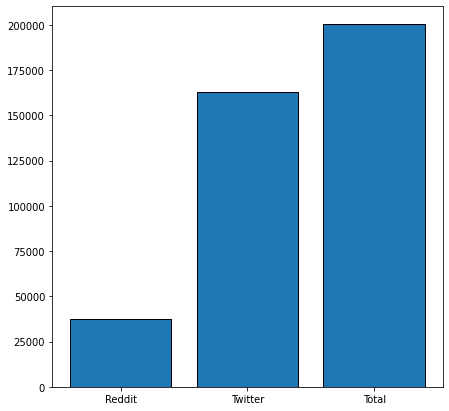

In [42]:
ds=['Reddit','Twitter','Total']
length=[len(df_reddit),len(df_twitter),len(df)]
plt.figure(figsize=(7,7))
plt.bar(ds, length,  edgecolor='black')


<AxesSubplot:xlabel='target', ylabel='count'>

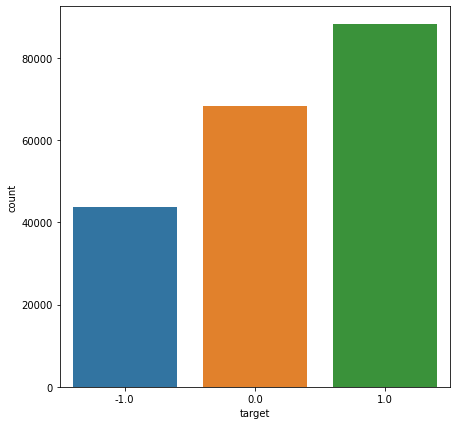

In [43]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x=df.target)

In [44]:
df=df.dropna()
df=df.drop_duplicates(keep='first')
df = df.reset_index()
df.isnull().sum()

index     0
text      0
target    0
dtype: int64

In [45]:
# Convert All the text into Lower Case Letters
df['lower']=df['text'].apply(lambda x: x.lower())
df.head()

,index,text,target,lower
0,0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...
1,1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


In [46]:
#Remove the Punctuations from the string
df['Rmv_Punc'] =df['lower'].apply( lambda x : x.translate(str.maketrans('', '', string.punctuation)))
df.head()

,index,text,target,lower,Rmv_Punc
0,0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...,when modi promised “minimum government maximum...
1,1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,talk all the nonsense and continue all the dra...
2,2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,what did just say vote for modi welcome bjp t...
3,3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,asking his supporters prefix chowkidar their n...
4,4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,answer who among these the most powerful world...


In [47]:
#Remove Stopwords from the text
df['Rem_SW']=df['Rmv_Punc'].apply(lambda x: remove_stopwords(x))
df.head()

,index,text,target,lower,Rmv_Punc,Rem_SW
0,0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...,when modi promised “minimum government maximum...,modi promised “minimum government maximum gove...
1,1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi
2,2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,what did just say vote for modi welcome bjp t...,vote modi welcome bjp told rahul main campaign...
3,3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...
4,4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,answer who among these the most powerful world...,answer powerful world leader today trump putin...


In [48]:
#Tokenized the text
df['tokenized_text']=df['Rem_SW'].apply(lambda x: word_tokenize(x))
df.head()

,index,text,target,lower,Rmv_Punc,Rem_SW,tokenized_text
0,0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...,when modi promised “minimum government maximum...,modi promised “minimum government maximum gove...,"[modi, promised, “, minimum, government, maxim..."
1,1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi,"[talk, nonsense, continue, drama, vote, modi]"
2,2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,what did just say vote for modi welcome bjp t...,vote modi welcome bjp told rahul main campaign...,"[vote, modi, welcome, bjp, told, rahul, main, ..."
3,3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...,"[asking, supporters, prefix, chowkidar, names,..."
4,4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,answer who among these the most powerful world...,answer powerful world leader today trump putin...,"[answer, powerful, world, leader, today, trump..."


In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def PS (text):
    text=list(ps.stem(c) for c in text)
    return text 
df['PS_text']=df['tokenized_text'].apply(lambda x: PS(x))
df.head()

,index,text,target,lower,Rmv_Punc,Rem_SW,tokenized_text,PS_text
0,0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...,when modi promised “minimum government maximum...,modi promised “minimum government maximum gove...,"[modi, promised, “, minimum, government, maxim...","[modi, promis, “, minimum, govern, maximum, go..."
1,1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi,"[talk, nonsense, continue, drama, vote, modi]","[talk, nonsens, continu, drama, vote, modi]"
2,2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,what did just say vote for modi welcome bjp t...,vote modi welcome bjp told rahul main campaign...,"[vote, modi, welcome, bjp, told, rahul, main, ...","[vote, modi, welcom, bjp, told, rahul, main, c..."
3,3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...,"[asking, supporters, prefix, chowkidar, names,...","[ask, support, prefix, chowkidar, name, modi, ..."
4,4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,answer who among these the most powerful world...,answer powerful world leader today trump putin...,"[answer, powerful, world, leader, today, trump...","[answer, power, world, leader, today, trump, p..."


In [50]:
def Join(text):
  text=" ".join(text)
df['Final_text']=df['PS_text'].apply(lambda x: " ".join(x))
df.head()

,index,text,target,lower,Rmv_Punc,Rem_SW,tokenized_text,PS_text,Final_text
0,0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...,when modi promised “minimum government maximum...,modi promised “minimum government maximum gove...,"[modi, promised, “, minimum, government, maxim...","[modi, promis, “, minimum, govern, maximum, go...",modi promis “ minimum govern maximum govern ” ...
1,1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi,"[talk, nonsense, continue, drama, vote, modi]","[talk, nonsens, continu, drama, vote, modi]",talk nonsens continu drama vote modi
2,2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,what did just say vote for modi welcome bjp t...,vote modi welcome bjp told rahul main campaign...,"[vote, modi, welcome, bjp, told, rahul, main, ...","[vote, modi, welcom, bjp, told, rahul, main, c...",vote modi welcom bjp told rahul main campaign ...
3,3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...,"[asking, supporters, prefix, chowkidar, names,...","[ask, support, prefix, chowkidar, name, modi, ...",ask support prefix chowkidar name modi great s...
4,4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,answer who among these the most powerful world...,answer powerful world leader today trump putin...,"[answer, powerful, world, leader, today, trump...","[answer, power, world, leader, today, trump, p...",answer power world leader today trump putin modi


In [51]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
tfidf_vectorizer.fit(df['Final_text'])
X = tfidf_vectorizer.transform(df['Final_text'])

In [52]:
X.shape

(199708, 3000)

In [53]:
y=df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

In [55]:

svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [56]:
mod2=knc.fit(X_train,y_train)

In [57]:
mod3=mnb.fit(X_train,y_train)

In [58]:
mod4=dtc.fit(X_train,y_train)

In [59]:
mod5=lrc.fit(X_train,y_train)

In [ ]:
mod6=rfc.fit(X_train,y_train)

In [ ]:
mod7=gbdt.fit(X_train,y_train)

In [ ]:
mod8=abc.fit(X_train,y_train)

In [ ]:
y_pred1=mod2.predict(X_test)
y_pred2=mod3.predict(X_test)
y_pred3=mod4.predict(X_test)
y_pred4=mod5.predict(X_test)
y_pred5=mod6.predict(X_test)
y_pred6=mod7.predict(X_test)
y_pred7=mod8.predict(X_test)

#from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,y_pred1)
ac2=accuracy_score(y_test,y_pred2)
ac3=accuracy_score(y_test,y_pred3)
ac4=accuracy_score(y_test,y_pred4)
ac5=accuracy_score(y_test,y_pred5)
ac6=accuracy_score(y_test,y_pred6)
ac7=accuracy_score(y_test,y_pred7)


In [ ]:
result=pd.DataFrame({'Model':['KNeighborsClassifier','MultinomialNB','DecisionTreeClassifier','LogisticRegression'
,'RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier'],'Accuracy':[ac1,ac2,ac3,ac4,ac5,ac6,ac7] })
print(result)

                        Model  Accuracy
0        KNeighborsClassifier  0.441224
1               MultinomialNB  0.668396
2      DecisionTreeClassifier  0.503896
3          LogisticRegression  0.814028
4      RandomForestClassifier  0.786448
5  GradientBoostingClassifier  0.649388
6          AdaBoostClassifier  0.652352


In [27]:
def transform(text):
  text=text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = remove_stopwords(text)
  text=word_tokenize(text)
  ps = PorterStemmer()
  new=[]
  for ele in range(len(text)):
    new.append(ps.stem(text[ele]))
  text=new
  text=str(" ".join(text))
  return text
  

In [28]:
t=transform(df['text'][600])
t_matrix=tfidf_vectorizer.transform(word_tokenize(t))
print(mod5.predict(t_matrix))
if mod5.predict(t_matrix).mean()> 0:
  print(1)
elif mod5.predict(t_matrix).mean()== 0:
  print(0)
else:
  print(-1)

NameError: ignored

In [ ]:
file_name1=open("tfidf.pkl","wb")
pickle.dump(tfidf_vectorizer,file_name1)

In [ ]:
import pickle 
file_name=open("model.pkl","wb")
pickle.dump(mod5,file_name)